In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/MyDrive/ADS/Machine Learning II/Machine Learning II_Project/final_tmdb_with_success.csv'
df = pd.read_csv(file_path)

df.head()

,id,title,revenue,runtime,budget,original_title,release_year,release_month,top_cast_count,top_writers_count,...,genre_Mystery,genre_Romance,genre_Science_Fiction,genre_TV_Movie,genre_Thriller,genre_War,genre_Western,is_english,spoken_has_english,success
0,5,Four Rooms,4257354.0,98.0,4000000.0,Four Rooms,1995.0,12.0,1,0,...,0,0,0,0,0,0,0,1,1,0
1,6,Judgment Night,12136938.0,109.0,21000000.0,Judgment Night,1993.0,10.0,0,0,...,0,0,0,0,1,0,0,1,1,0
2,12,Finding Nemo,940335536.0,100.0,94000000.0,Finding Nemo,2003.0,5.0,1,0,...,0,0,0,0,0,0,0,1,1,1
3,13,Forrest Gump,677387716.0,142.0,55000000.0,Forrest Gump,1994.0,6.0,1,0,...,0,1,0,0,0,0,0,1,1,1
4,14,American Beauty,356296601.0,122.0,15000000.0,American Beauty,1999.0,9.0,0,0,...,0,0,0,0,0,0,0,1,1,1


In [4]:
file_path2 = "/content/drive/MyDrive/ADS/Machine Learning II/Machine Learning II_Project/final_transformed_dataset.csv"
df2 = pd.read_csv(file_path2)
df2.head()

,id,title,revenue,runtime,budget,original_title,release_year,release_month,top_cast_count,top_writers_count,...,genre_TV_Movie,genre_Thriller,genre_War,genre_Western,is_english,spoken_has_english,success,budget_log,historical_vote_count_log,iso_outlier
0,5,Four Rooms,4257354.0,98.0,4000000.0,Four Rooms,1995.0,12.0,1,0,...,0,0,0,0,1,1,0,15.201805,6.094061,0
1,6,Judgment Night,12136938.0,109.0,21000000.0,Judgment Night,1993.0,10.0,0,0,...,0,1,0,0,1,1,0,16.860033,6.511351,0
2,12,Finding Nemo,940335536.0,100.0,94000000.0,Finding Nemo,2003.0,5.0,1,0,...,0,0,0,0,1,1,1,18.358805,7.606822,0
3,13,Forrest Gump,677387716.0,142.0,55000000.0,Forrest Gump,1994.0,6.0,1,0,...,0,0,0,0,1,1,1,17.822844,6.066368,0
4,14,American Beauty,356296601.0,122.0,15000000.0,American Beauty,1999.0,9.0,0,0,...,0,0,0,0,1,1,1,16.523561,6.263342,0


In [5]:
# Step 1: Create a composite key in both dataframes
df['key'] = df['id'].astype(str) + "_" + df['title']
df2['key'] = df2['id'].astype(str) + "_" + df2['title']

# Step 2: Create a mapping from key to iso_outlier
outlier_map = df2.set_index('key')['iso_outlier']

# Step 3: Map iso_outlier into df using the composite key
df['iso_outlier'] = df['key'].map(outlier_map)

# Step 4: Check mapping result
print("Mapped values:", df['iso_outlier'].notna().sum(), "out of", len(df))

Mapped values: 5774 out of 8732


In [6]:
# Drop rows where iso_outlier was not mapped
df = df[df['iso_outlier'].notna()].copy()

In [7]:
df.head()

,id,title,revenue,runtime,budget,original_title,release_year,release_month,top_cast_count,top_writers_count,...,genre_Science_Fiction,genre_TV_Movie,genre_Thriller,genre_War,genre_Western,is_english,spoken_has_english,success,key,iso_outlier
0,5,Four Rooms,4257354.0,98.0,4000000.0,Four Rooms,1995.0,12.0,1,0,...,0,0,0,0,0,1,1,0,5_Four Rooms,0.0
1,6,Judgment Night,12136938.0,109.0,21000000.0,Judgment Night,1993.0,10.0,0,0,...,0,0,1,0,0,1,1,0,6_Judgment Night,0.0
2,12,Finding Nemo,940335536.0,100.0,94000000.0,Finding Nemo,2003.0,5.0,1,0,...,0,0,0,0,0,1,1,1,12_Finding Nemo,0.0
3,13,Forrest Gump,677387716.0,142.0,55000000.0,Forrest Gump,1994.0,6.0,1,0,...,0,0,0,0,0,1,1,1,13_Forrest Gump,0.0
4,14,American Beauty,356296601.0,122.0,15000000.0,American Beauty,1999.0,9.0,0,0,...,0,0,0,0,0,1,1,1,14_American Beauty,0.0


In [8]:
# Step 1: Convert iso_outlier to integer
df['iso_outlier'] = df['iso_outlier'].astype(int)

# Step 2: Split into normal and edge sets
normal_set = df[df['iso_outlier'] == 0].copy()
edge_set = df[df['iso_outlier'] == 1].copy()

In [9]:
df

,id,title,revenue,runtime,budget,original_title,release_year,release_month,top_cast_count,top_writers_count,...,genre_Science_Fiction,genre_TV_Movie,genre_Thriller,genre_War,genre_Western,is_english,spoken_has_english,success,key,iso_outlier
0,5,Four Rooms,4257354.0,98.0,4000000.0,Four Rooms,1995.0,12.0,1,0,...,0,0,0,0,0,1,1,0,5_Four Rooms,0
1,6,Judgment Night,12136938.0,109.0,21000000.0,Judgment Night,1993.0,10.0,0,0,...,0,0,1,0,0,1,1,0,6_Judgment Night,0
2,12,Finding Nemo,940335536.0,100.0,94000000.0,Finding Nemo,2003.0,5.0,1,0,...,0,0,0,0,0,1,1,1,12_Finding Nemo,0
3,13,Forrest Gump,677387716.0,142.0,55000000.0,Forrest Gump,1994.0,6.0,1,0,...,0,0,0,0,0,1,1,1,13_Forrest Gump,0
4,14,American Beauty,356296601.0,122.0,15000000.0,American Beauty,1999.0,9.0,0,0,...,0,0,0,0,0,1,1,1,14_American Beauty,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8645,1379520,Rule Breakers,1503826.0,120.0,15000000.0,Rule Breakers,2025.0,3.0,0,0,...,0,0,0,0,0,1,1,0,1379520_Rule Breakers,0
8650,1380415,The Last Supper,6254291.0,114.0,8000000.0,The Last Supper,2025.0,3.0,0,0,...,0,0,0,0,0,1,1,0,1380415_The Last Supper,0
8676,1416532,Martin,210000000.0,128.0,103000000.0,Martin,2025.0,1.0,0,0,...,0,0,0,0,0,1,1,0,1416532_Martin,0
8683,1421494,Mortal Kombat Legacy,557015.0,104.0,100000.0,Mortal Kombat Legacy,2011.0,4.0,0,0,...,1,0,0,0,0,1,1,1,1421494_Mortal Kombat Legacy,0


# New addition:  Revenue-to-Budget Ratio by Success

📊 Revenue-to-Budget Ratio Summary by Success:
              min       25%       50%      mean       75%         max
success                                                              
0        0.000715  0.276472  0.815763  0.943537  1.521647    2.495701
1        2.500000  3.237750  4.348582  7.690083  6.861559  899.329302


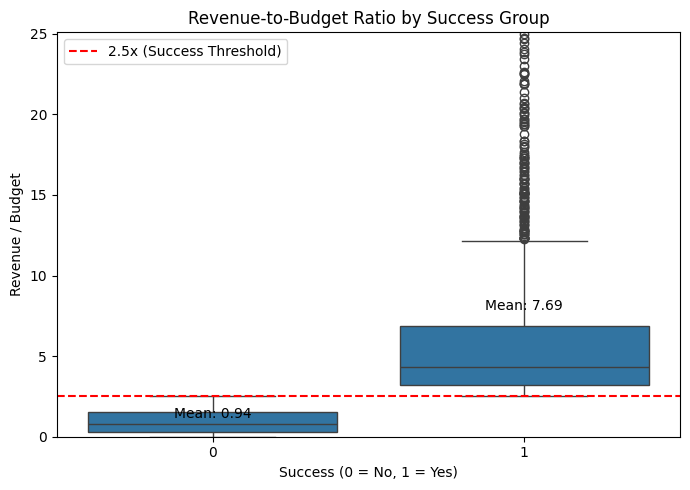

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Ensure ratio is defined and clean
df['revenue_budget_ratio'] = df['revenue'] / df['budget']
df = df.replace([float('inf'), -float('inf')], pd.NA)
df = df.dropna(subset=['revenue_budget_ratio'])

# Step 2: Summary statistics for reporting
grouped_stats = df.groupby('success')['revenue_budget_ratio'].describe(percentiles=[0.25, 0.5, 0.75])
print("📊 Revenue-to-Budget Ratio Summary by Success:")
print(grouped_stats[['min', '25%', '50%', 'mean', '75%', 'max']])

# Step 3: Boxplot with mean annotation and 2.5x threshold
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='success', y='revenue_budget_ratio')
plt.axhline(2.5, color='red', linestyle='--', label='2.5x (Success Threshold)')

# Add mean labels
means = df.groupby('success')['revenue_budget_ratio'].mean()
for i, m in enumerate(means):
    plt.text(i, m + 0.2, f"Mean: {m:.2f}", ha='center', color='black', fontsize=10)

plt.ylim(0, df['revenue_budget_ratio'].quantile(0.99))  # trim extreme outliers
plt.xlabel("Success (0 = No, 1 = Yes)")
plt.ylabel("Revenue / Budget")
plt.title("Revenue-to-Budget Ratio by Success Group")
plt.legend()
plt.tight_layout()
plt.show()

## Shared features: runtime, top_producers_count, top_production_companies_count

In [ ]:
# Runtime distribution (normal & edge)
print("Runtime - Normal Set:")
print(normal_set['runtime'].describe())
print("\nRuntime - Edge Set:")
print(edge_set['runtime'].describe())

# Top Production Companies Count distribution
print("\nTop Production Companies Count - Normal Set:")
print(normal_set['top_production_companies_count'].describe())
print("\nTop Production Companies Count - Edge Set:")
print(edge_set['top_production_companies_count'].describe())

# Top Producers Count distribution
print("\nTop Producers Count - Normal Set:")
print(normal_set['top_producers_count'].describe())
print("\nTop Producers Count - Edge Set:")
print(edge_set['top_producers_count'].describe())

Runtime - Normal Set:
count    5716.000000
mean      107.375262
std        18.226504
min        32.000000
25%        95.000000
50%       104.000000
75%       117.000000
max       254.000000
Name: runtime, dtype: float64

Runtime - Edge Set:
count     58.000000
mean     124.500000
std       45.468806
min       41.000000
25%       90.250000
50%      112.000000
75%      157.750000
max      279.000000
Name: runtime, dtype: float64

Top Production Companies Count - Normal Set:
count    5716.000000
mean        0.763471
std         0.724549
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: top_production_companies_count, dtype: float64

Top Production Companies Count - Edge Set:
count    58.00000
mean      1.00000
std       1.31122
min       0.00000
25%       0.00000
50%       0.00000
75%       2.00000
max       5.00000
Name: top_production_companies_count, dtype: float64

Top Producers Count - Normal Set:
count    5716.000000
mean 

In [ ]:
# Unique value counts (sorted) to see distribution shape

print("Runtime - Normal:")
print(normal_set['runtime'].value_counts().sort_index())

print("\nRuntime - Edge:")
print(edge_set['runtime'].value_counts().sort_index())

print("\nTop Production Companies Count - Normal:")
print(normal_set['top_production_companies_count'].value_counts().sort_index())

print("\nTop Production Companies Count - Edge:")
print(edge_set['top_production_companies_count'].value_counts().sort_index())

print("\nTop Producers Count - Normal:")
print(normal_set['top_producers_count'].value_counts().sort_index())

print("\nTop Producers Count - Edge:")
print(edge_set['top_producers_count'].value_counts().sort_index())

Runtime - Normal:
runtime
32.0     1
33.0     1
34.0     1
35.0     1
42.0     1
        ..
215.0    1
218.0    1
219.0    1
242.0    1
254.0    1
Name: count, Length: 138, dtype: int64

Runtime - Edge:
runtime
41.0     1
48.0     1
62.0     1
75.0     1
78.0     1
80.0     1
82.0     1
85.0     1
86.0     2
88.0     2
89.0     1
90.0     2
91.0     1
92.0     1
93.0     2
94.0     2
97.0     1
100.0    2
102.0    1
105.0    1
106.0    1
107.0    2
117.0    1
121.0    1
122.0    2
123.0    1
125.0    1
134.0    1
140.0    2
141.0    1
146.0    1
151.0    1
154.0    1
157.0    1
158.0    1
164.0    1
165.0    1
167.0    1
168.0    1
169.0    1
170.0    1
174.0    1
180.0    1
188.0    1
191.0    1
195.0    1
202.0    1
209.0    1
279.0    1
Name: count, dtype: int64

Top Production Companies Count - Normal:
top_production_companies_count
0    2205
1    2768
2     653
3      71
4      18
5       1
Name: count, dtype: int64

Top Production Companies Count - Edge:
top_production_companies_

<ipython-input-16-ea2830f018ec>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  runtime_rate = df.groupby('runtime_bin')['success'].mean().reset_index()
<ipython-input-16-ea2830f018ec>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='runtime_bin', y='success', data=runtime_rate, ax=axes[0], palette='crest')
<ipython-input-16-ea2830f018ec>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='top_production_companies_count', y='success', data=company_rate, ax=axes[1], palette='crest')
<ipython-inp

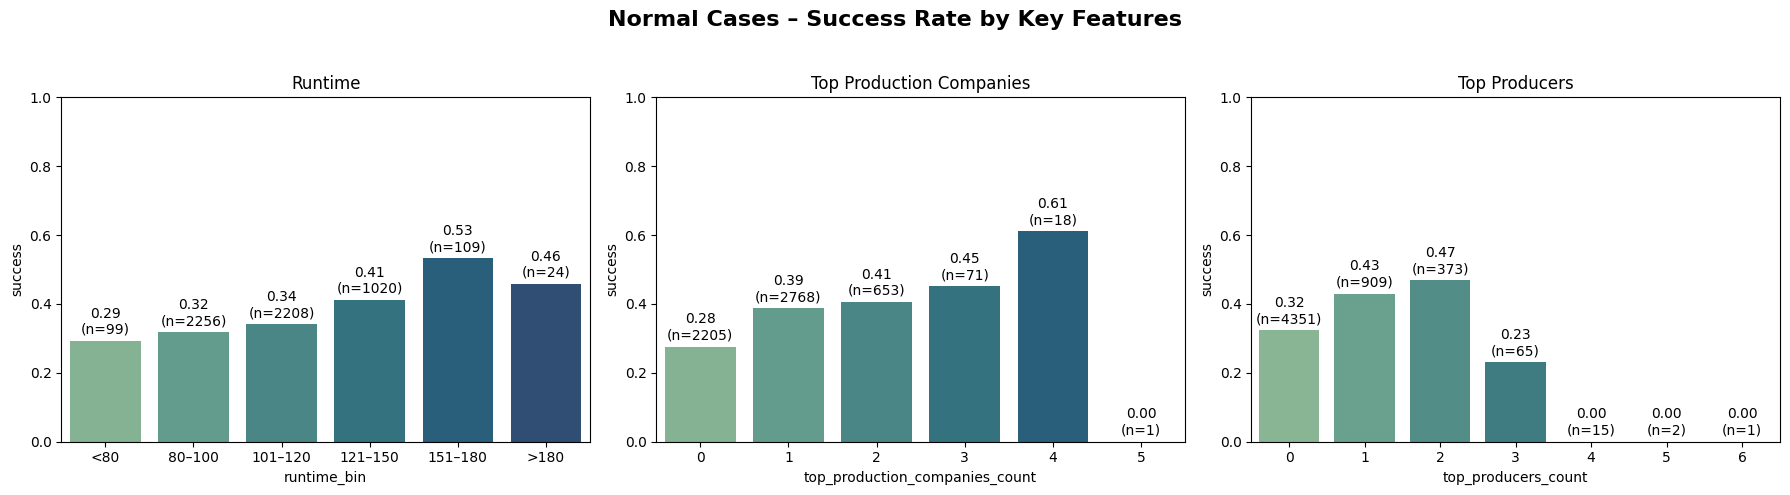

<ipython-input-16-ea2830f018ec>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  runtime_rate = df.groupby('runtime_bin')['success'].mean().reset_index()
<ipython-input-16-ea2830f018ec>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='runtime_bin', y='success', data=runtime_rate, ax=axes[0], palette='crest')
<ipython-input-16-ea2830f018ec>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='top_production_companies_count', y='success', data=company_rate, ax=axes[1], palette='crest')
<ipython-inp

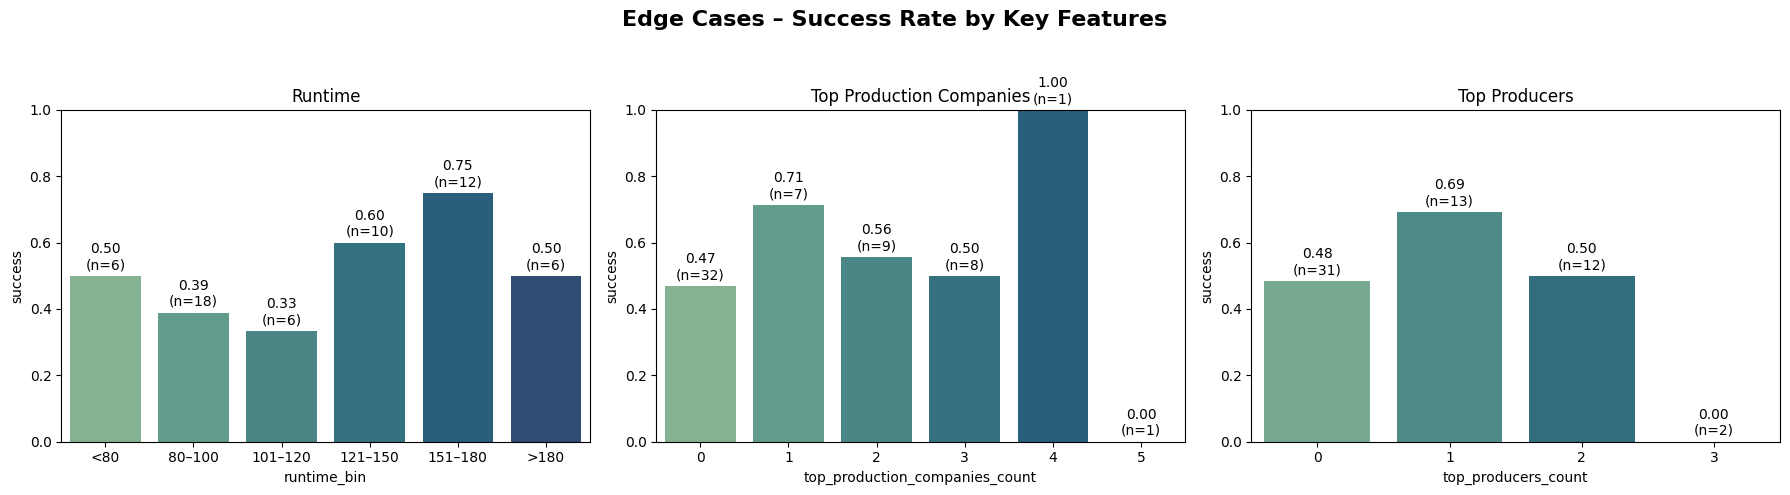

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define bin settings (only for runtime)
runtime_bins = [0, 80, 100, 120, 150, 180, 300]
runtime_labels = ['<80', '80–100', '101–120', '121–150', '151–180', '>180']

# Step 2: Apply runtime binning
for df_subset in [normal_set, edge_set]:
    df_subset['runtime_bin'] = pd.cut(df_subset['runtime'], bins=runtime_bins, labels=runtime_labels)

# Step 3: Define plotting function without binning company/producer counts
def plot_grouped_success_rate(df, label):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'{label} – Success Rate by Key Features', fontsize=16, fontweight='bold')

    # Runtime (binned)
    runtime_rate = df.groupby('runtime_bin')['success'].mean().reset_index()
    runtime_count = df['runtime_bin'].value_counts().reindex(runtime_rate['runtime_bin'])
    sns.barplot(x='runtime_bin', y='success', data=runtime_rate, ax=axes[0], palette='crest')
    axes[0].set_title('Runtime')
    axes[0].set_ylim(0, 1)
    for i, val in enumerate(runtime_rate['success']):
        axes[0].text(i, val + 0.02, f'{val:.2f}\n(n={runtime_count.iloc[i]})', ha='center')

    # Top Production Companies (raw count)
    company_rate = df.groupby('top_production_companies_count')['success'].mean().reset_index()
    company_count = df['top_production_companies_count'].value_counts().reindex(company_rate['top_production_companies_count'])
    sns.barplot(x='top_production_companies_count', y='success', data=company_rate, ax=axes[1], palette='crest')
    axes[1].set_title('Top Production Companies')
    axes[1].set_ylim(0, 1)
    for i, val in enumerate(company_rate['success']):
        axes[1].text(i, val + 0.02, f'{val:.2f}\n(n={company_count.iloc[i]})', ha='center')

    # Top Producers (raw count)
    producer_rate = df.groupby('top_producers_count')['success'].mean().reset_index()
    producer_count = df['top_producers_count'].value_counts().reindex(producer_rate['top_producers_count'])
    sns.barplot(x='top_producers_count', y='success', data=producer_rate, ax=axes[2], palette='crest')
    axes[2].set_title('Top Producers')
    axes[2].set_ylim(0, 1)
    for i, val in enumerate(producer_rate['success']):
        axes[2].text(i, val + 0.02, f'{val:.2f}\n(n={producer_count.iloc[i]})', ha='center')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Step 4: Plot for both sets
plot_grouped_success_rate(normal_set, 'Normal Cases')
plot_grouped_success_rate(edge_set, 'Edge Cases')

# Features for normal cases only: release year, budget, action genre

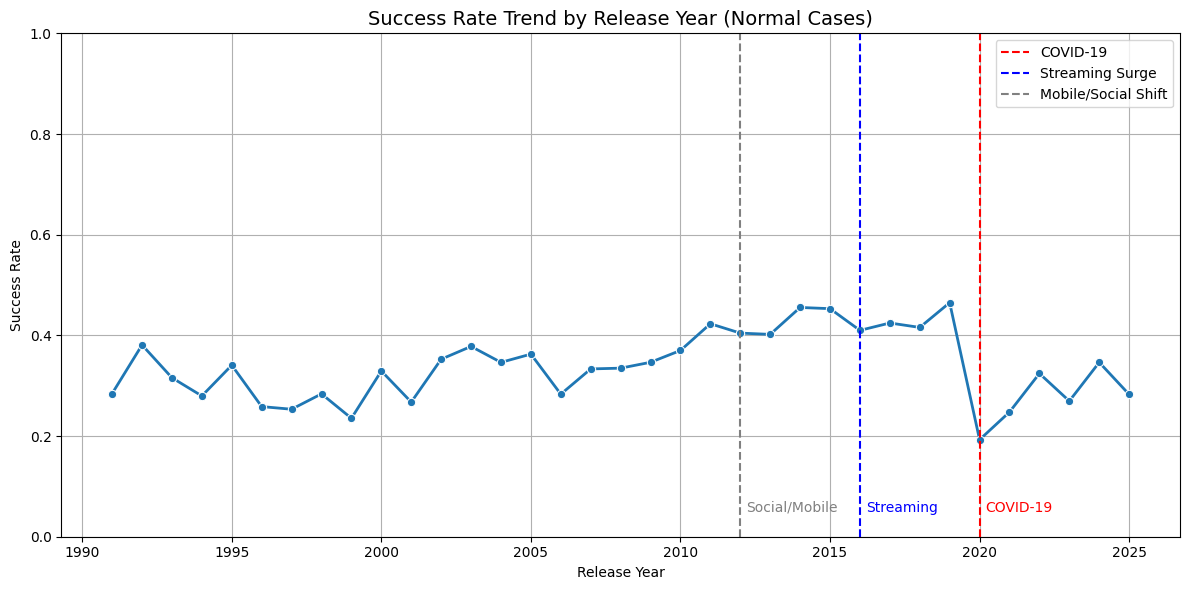

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group by release_year and calculate success rate
yearly_success = normal_set.groupby('release_year')['success'].mean().reset_index()

# Step 2: Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_success, x='release_year', y='success', marker='o', linewidth=2)

# Step 3: Annotate breakpoints
plt.axvline(x=2020, color='red', linestyle='--', label='COVID-19')
plt.axvline(x=2016, color='blue', linestyle='--', label='Streaming Surge')
plt.axvline(x=2012, color='gray', linestyle='--', label='Mobile/Social Shift')

# Optional: label annotations
plt.text(2020.2, 0.05, 'COVID-19', color='red')
plt.text(2016.2, 0.05, 'Streaming', color='blue')
plt.text(2012.2, 0.05, 'Social/Mobile', color='gray')

# Step 4: Plot formatting
plt.title('Success Rate Trend by Release Year (Normal Cases)', fontsize=14)
plt.xlabel('Release Year')
plt.ylabel('Success Rate')
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

<ipython-input-18-c61ffc39bf9d>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  budget_rate = normal_set.groupby('budget_bin')['success'].mean().reset_index()
<ipython-input-18-c61ffc39bf9d>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='budget_bin', y='success', data=budget_rate, ax=axes[0], palette='crest')
<ipython-input-18-c61ffc39bf9d>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genre_Action', y='success', data=genre_rate, ax=axes[1], palette='crest')


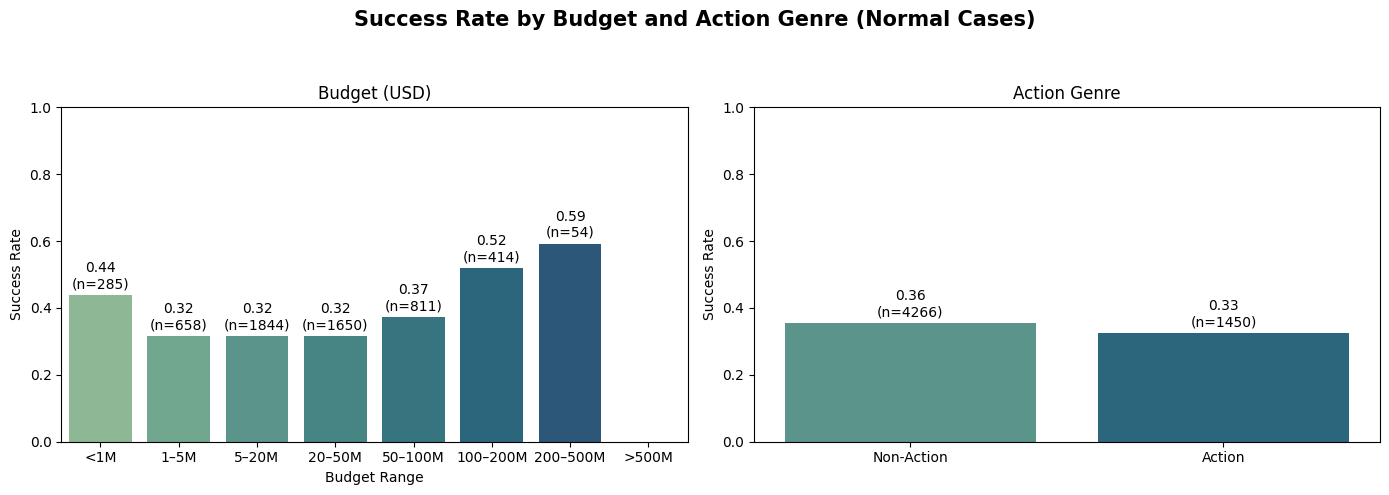

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Bin budget into intuitive investment ranges
budget_bins = [0, 1e6, 5e6, 2e7, 5e7, 1e8, 2e8, 5e8, 1e9]
budget_labels = [
    '<1M', '1–5M', '5–20M', '20–50M',
    '50–100M', '100–200M', '200–500M', '>500M'
]

normal_set['budget_bin'] = pd.cut(normal_set['budget'], bins=budget_bins, labels=budget_labels)

# Step 2: Prepare data
budget_rate = normal_set.groupby('budget_bin')['success'].mean().reset_index()
budget_count = normal_set['budget_bin'].value_counts().reindex(budget_rate['budget_bin'])

genre_rate = normal_set.groupby('genre_Action')['success'].mean().reset_index()
genre_count = normal_set['genre_Action'].value_counts().reindex(genre_rate['genre_Action'])

# Step 3: Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Success Rate by Budget and Action Genre (Normal Cases)', fontsize=15, fontweight='bold')

# Budget plot
sns.barplot(x='budget_bin', y='success', data=budget_rate, ax=axes[0], palette='crest')
axes[0].set_title('Budget (USD)')
axes[0].set_xlabel('Budget Range')
axes[0].set_ylabel('Success Rate')
axes[0].set_ylim(0, 1)
for i, val in enumerate(budget_rate['success']):
    axes[0].text(i, val + 0.02, f'{val:.2f}\n(n={budget_count.iloc[i]})', ha='center')

# Genre Action plot
genre_rate['genre_Action'] = genre_rate['genre_Action'].map({0: 'Non-Action', 1: 'Action'})
sns.barplot(x='genre_Action', y='success', data=genre_rate, ax=axes[1], palette='crest')
axes[1].set_title('Action Genre')
axes[1].set_xlabel('')
axes[1].set_ylabel('Success Rate')
axes[1].set_ylim(0, 1)
for i, val in enumerate(genre_rate['success']):
    axes[1].text(i, val + 0.02, f'{val:.2f}\n(n={genre_count.iloc[i]})', ha='center')

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

# Features for edge cases only: historical vote count, top cast count, documentary genre

<ipython-input-22-b82a276105cc>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vote_rate = edge_set.groupby('vote_bin')['success'].mean().reset_index()
<ipython-input-22-b82a276105cc>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='vote_bin', y='success', data=vote_rate, ax=axes[0], palette='crest')
<ipython-input-22-b82a276105cc>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genre_Documentary', y='success', data=genre_rate, ax=axes[1], palette='crest')
<ipython-input-22-b82a276105cc>:4

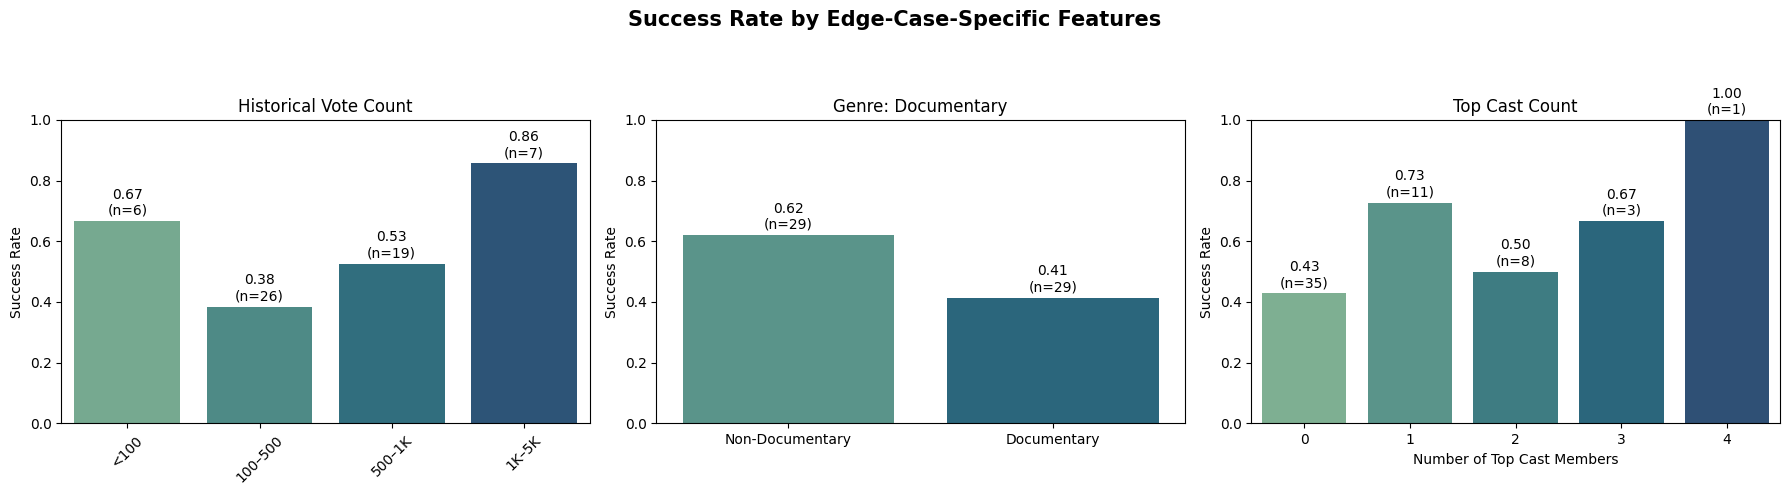

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Bin historical_vote_count (log-transformed originally)
vote_bins = [0, 100, 500, 1000, 5000]
vote_labels = ['<100', '100–500', '500–1K', '1K–5K']
edge_set['vote_bin'] = pd.cut(edge_set['historical_vote_count'], bins=vote_bins, labels=vote_labels)

# Step 2: Prepare data for each variable
vote_rate = edge_set.groupby('vote_bin')['success'].mean().reset_index()
vote_count = edge_set['vote_bin'].value_counts().reindex(vote_rate['vote_bin'])

genre_rate = edge_set.groupby('genre_Documentary')['success'].mean().reset_index()
genre_count = edge_set['genre_Documentary'].value_counts().reindex(genre_rate['genre_Documentary'])

cast_rate = edge_set.groupby('top_cast_count')['success'].mean().reset_index()
cast_count = edge_set['top_cast_count'].value_counts().reindex(cast_rate['top_cast_count'])

# Step 3: Plot all three side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Success Rate by Edge-Case-Specific Features', fontsize=15, fontweight='bold')

# Plot 1: Historical Vote Count
sns.barplot(x='vote_bin', y='success', data=vote_rate, ax=axes[0], palette='crest')
axes[0].set_title('Historical Vote Count')
axes[0].set_xlabel('')
axes[0].set_ylabel('Success Rate')
axes[0].set_ylim(0, 1)
axes[0].tick_params(axis='x', rotation=45)
for i, val in enumerate(vote_rate['success']):
    axes[0].text(i, val + 0.02, f'{val:.2f}\n(n={vote_count.iloc[i]})', ha='center')

# Plot 2: Genre Documentary
genre_rate['genre_Documentary'] = genre_rate['genre_Documentary'].map({0: 'Non-Documentary', 1: 'Documentary'})
sns.barplot(x='genre_Documentary', y='success', data=genre_rate, ax=axes[1], palette='crest')
axes[1].set_title('Genre: Documentary')
axes[1].set_xlabel('')
axes[1].set_ylabel('Success Rate')
axes[1].set_ylim(0, 1)
for i, val in enumerate(genre_rate['success']):
    axes[1].text(i, val + 0.02, f'{val:.2f}\n(n={genre_count.iloc[i]})', ha='center')

# Plot 3: Top Cast Count (no binning)
sns.barplot(x='top_cast_count', y='success', data=cast_rate, ax=axes[2], palette='crest')
axes[2].set_title('Top Cast Count')
axes[2].set_xlabel('Number of Top Cast Members')
axes[2].set_ylabel('Success Rate')
axes[2].set_ylim(0, 1)
for i, val in enumerate(cast_rate['success']):
    axes[2].text(i, val + 0.02, f'{val:.2f}\n(n={cast_count.iloc[i]})', ha='center')

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()